<a href="https://colab.research.google.com/github/Pipickin/Tensorflow/blob/main/Images/Simple_model/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

sample_data


In [ ]:
# import some module from keras
from keras.datasets import mnist   
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils

In [ ]:
batch_size = 128
num_epochs = 20
hidden_size = 512

In [ ]:
num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
image_size = height*width
num_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape((-1,height*width))
X_test = X_test.reshape((-1, height*width))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize our input 
X_train = X_train/255
X_test = X_test/255

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# To set layers
inp = Input(shape=(height*width,))
hidden_1 = Dense(hidden_size, activation='relu')(inp)
hidden_2 = Dense(hidden_size, activation = 'relu')(hidden_1)
out = Dense(num_classes, activation = 'softmax')(hidden_2)

model = Model(inputs = inp, outputs = out) # To define a model, just specify its input and output layers

In [ ]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [ ]:
model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 0.2298 - accuracy: 0.9315 - val_loss: 0.1012 - val_accuracy: 0.9687
Epoch 2/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0822 - accuracy: 0.9746 - val_loss: 0.0889 - val_accuracy: 0.9765
Epoch 3/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 4/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 5/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0715 - val_accuracy: 0.9790
Epoch 6/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0895 - val_accuracy: 0.9788
Epoch 7/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0853 - val_accuracy: 0.9798

[0.0934298112988472, 0.9828000068664551]

In [ ]:
# Import pyplot from matplotlib to show numbers
import matplotlib.pyplot as plt
import numpy as np

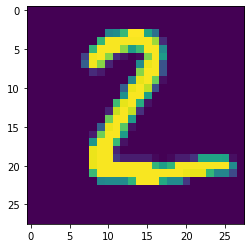

2


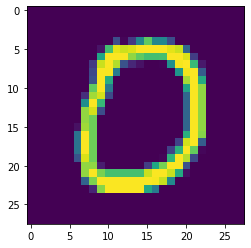

0


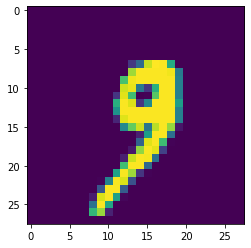

9


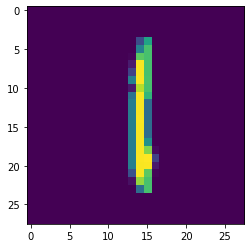

1


In [ ]:
# Let's take a look at our numbers and check what our model predicts
use_samples = [1, 10, 1000, 2444]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
    reshaped_image = X_test[sample].reshape((width, height))
    plt.imshow(reshaped_image)
    plt.show()
  # Add sample to array for prediction
    sample_predict = model.predict(X_test[sample].reshape((1,image_size)))
    print(np.argmax(sample_predict))      # np.argmax helps us to find number with the hieghest chance
    